In [18]:
import pandas as pd

# Load the dataset
file_path = "predictive_maintenance.csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Display basic information
print(df.info())

# Show first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L         

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


Defaulting to user installation because normal site-packages is not writeable


In [20]:
df = pd.read_csv('predictive_maintenance.csv')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L         

In [21]:

print(df.isnull().sum())
print(df['Target'].value_counts())
print(df['Failure Type'].value_counts())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64
Target
0    9661
1     339
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


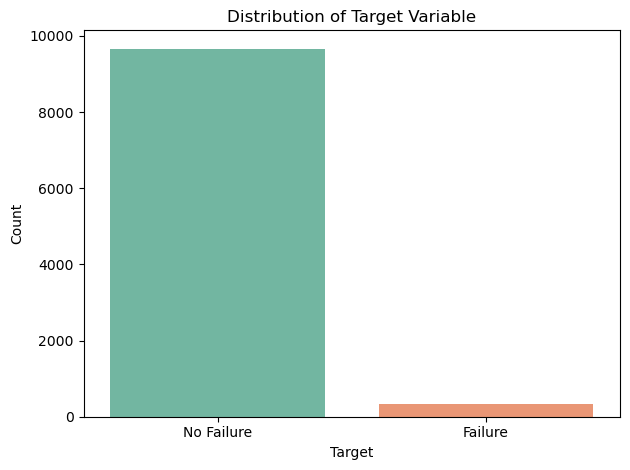

In [22]:

sns.countplot(data=df, x='Target', palette='Set2')
plt.title('Distribution of Target Variable')
plt.xticks([0, 1], ['No Failure', 'Failure'])
plt.ylabel('Count')
plt.xlabel('Target')
plt.tight_layout()
plt.show()

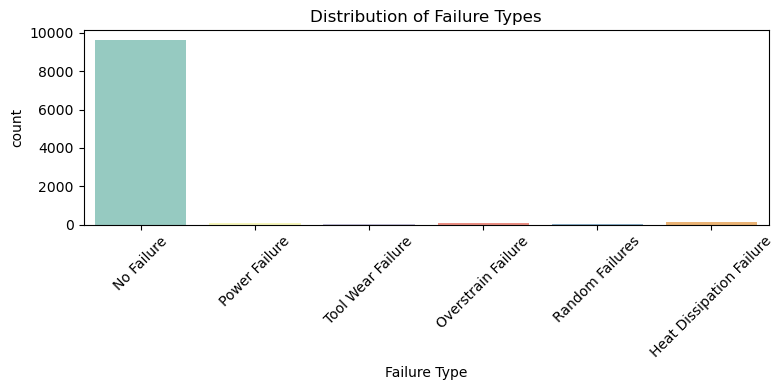

In [23]:

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Failure Type', palette='Set3')
plt.title('Distribution of Failure Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:

df_clean = df.drop(['UDI', 'Product ID', 'Failure Type'], axis=1)
df_encoded = pd.get_dummies(df_clean, columns=['Type'], drop_first=True)
df_encoded

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,False,True
1,298.2,308.7,1408,46.3,3,0,True,False
2,298.1,308.5,1498,49.4,5,0,True,False
3,298.2,308.6,1433,39.5,7,0,True,False
4,298.2,308.7,1408,40.0,9,0,True,False
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,False,True
9996,298.9,308.4,1632,31.8,17,0,False,False
9997,299.0,308.6,1645,33.4,22,0,False,True
9998,299.0,308.7,1408,48.5,25,0,False,False


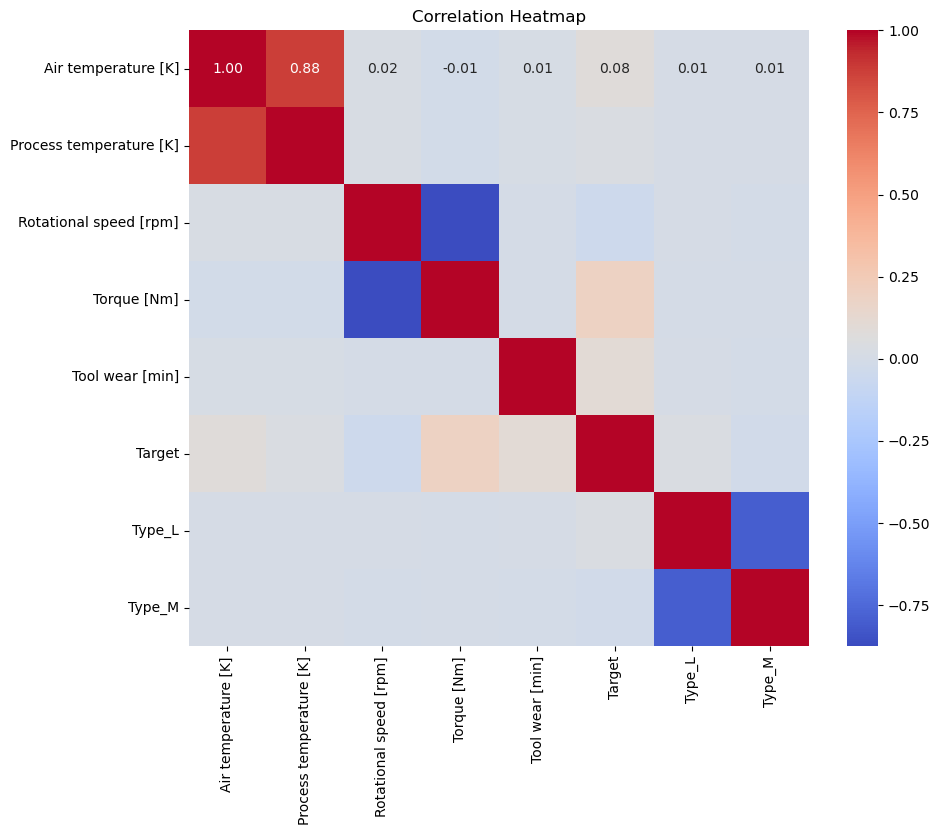

In [25]:

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [26]:

X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [27]:

X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace(' ', '_') for col in X_train.columns]
X_test.columns = X_train.columns


In [28]:

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
xgb = XGBClassifier(scale_pos_weight=(y == 0).sum() / (y == 1).sum(), use_label_encoder=False, eval_metric='logloss', random_state=42)

log_reg.fit(X_train, y_train)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

C:\Users\sande\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:03:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [29]:

y_pred_log = log_reg.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


In [30]:

def get_scores(name, y_true, y_pred):
    print(f"\n{name} Evaluation Report")
    print(classification_report(y_true, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred):.4f}")
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred)
    }


In [31]:
#Evaluate All Models
results = [
    get_scores("Logistic Regression", y_test, y_pred_log),
    get_scores("Decision Tree", y_test, y_pred_tree),
    get_scores("Random Forest", y_test, y_pred_rf),
    get_scores("XGBoost", y_test, y_pred_xgb)
]


Logistic Regression Evaluation Report
              precision    recall  f1-score   support

           0     0.9932    0.8287    0.9035      1932
           1     0.1469    0.8382    0.2500        68

    accuracy                         0.8290      2000
   macro avg     0.5700    0.8335    0.5767      2000
weighted avg     0.9644    0.8290    0.8813      2000

Confusion Matrix:
[[1601  331]
 [  11   57]]
ROC AUC: 0.8335

Decision Tree Evaluation Report
              precision    recall  f1-score   support

           0     0.9866    0.9917    0.9892      1932
           1     0.7241    0.6176    0.6667        68

    accuracy                         0.9790      2000
   macro avg     0.8554    0.8047    0.8279      2000
weighted avg     0.9777    0.9790    0.9782      2000

Confusion Matrix:
[[1916   16]
 [  26   42]]
ROC AUC: 0.8047

Random Forest Evaluation Report
              precision    recall  f1-score   support

           0     0.9817    0.9990    0.9903      1932
          

In [32]:
#Display Comparison
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0              XGBoost    0.9825   0.732394  0.764706  0.748201  0.877436
1        Decision Tree    0.9790   0.724138  0.617647  0.666667  0.804683
2        Random Forest    0.9810   0.941176  0.470588  0.627451  0.734777
3  Logistic Regression    0.8290   0.146907  0.838235  0.250000  0.833455


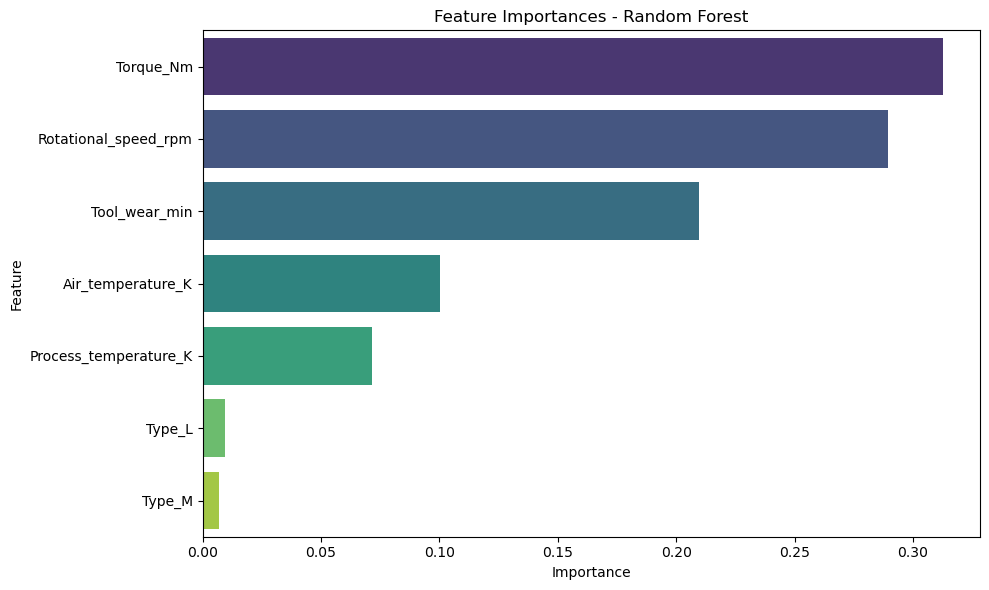

In [33]:
#Feature Importance Plot (Random Forest)
importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


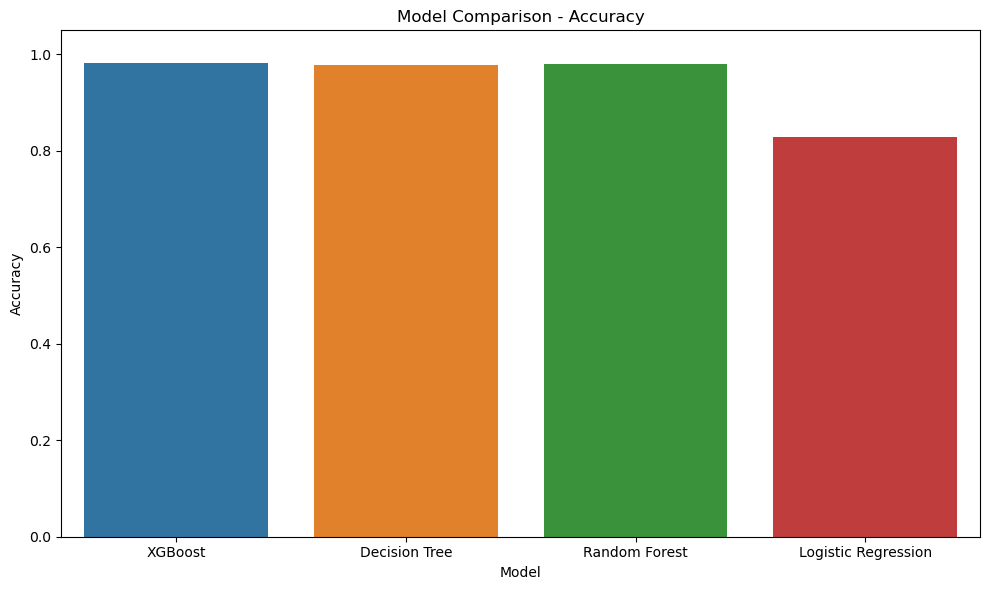

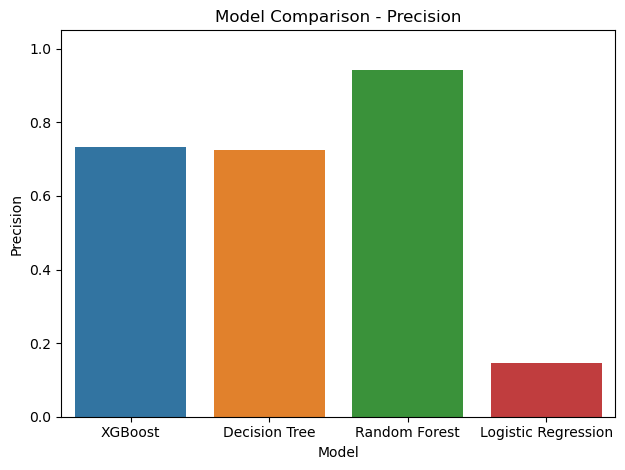

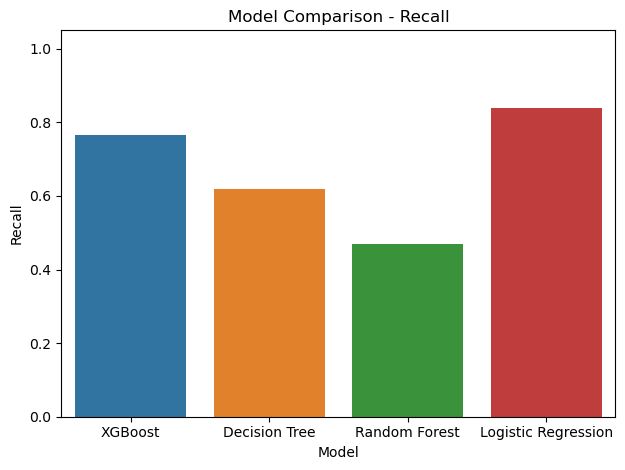

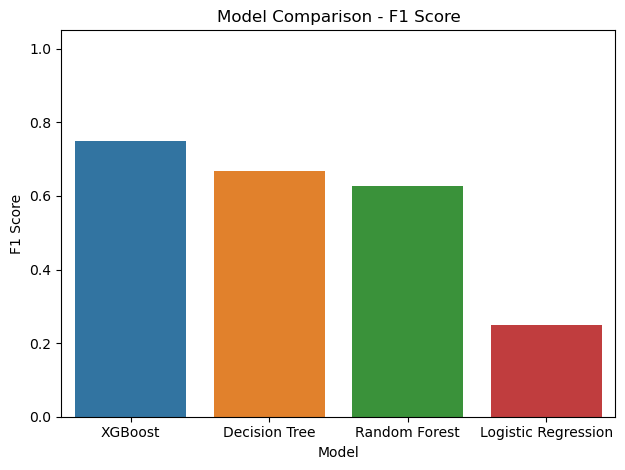

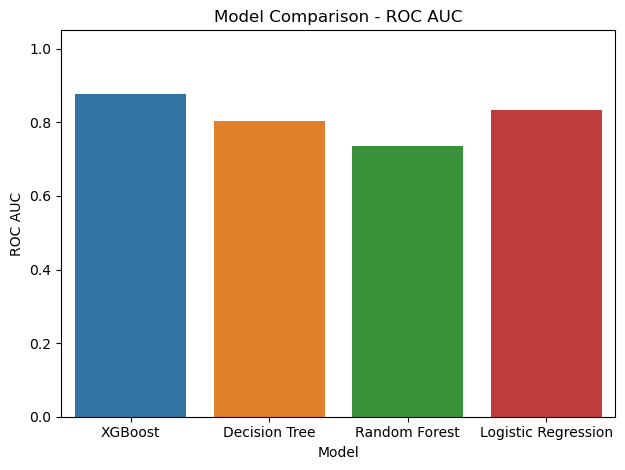

In [34]:
#Performance Comparison Plot
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for metric in metrics:
    sns.barplot(data=results_df, x='Model', y=metric, label=metric)
    plt.title(f'Model Comparison - {metric}')
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()